## Cancer Data Using CNN


In [1]:
import os
import warnings
warnings.filterwarnings("ignore")

### File Directory

In [2]:
base_dir = "Cancer_data"

In [3]:
train_dir = os.path.join(base_dir,'train')
validation_dir = os.path.join(base_dir, 'test')

### Load The Module

In [4]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.preprocessing.image import  ImageDataGenerator



### Train The Data

In [6]:
train_datagen = ImageDataGenerator(
    
    rescale = 1./255,
    rotation_range = 40,
    horizontal_flip = True,
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [7]:
image_size = (28, 28)
batch_size = 5

### Train Generator with Data Augmentation

In [8]:
train_generator = train_datagen.flow_from_directory(
    
    train_dir,
    
    target_size = image_size,
    batch_size = batch_size,
    class_mode = 'binary'
)

valid_generator = valid_datagen.flow_from_directory(
     
     validation_dir,
    
     target_size = image_size,
     batch_size = batch_size,
     class_mode = 'binary'
)

Found 11879 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


### Set layer, Model, input

In [9]:
from tensorflow.keras import layers, models, Input

In [10]:
model = models.Sequential([
    Input(shape=(28, 28, 3)),
    layers.Conv2D(32,(3, 3), activation= 'relu'),
    layers.MaxPooling2D(2, 2),
    layers.Conv2D(64, (3, 3), activation= 'relu'),     
    layers.MaxPooling2D(2, 2),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid') #output layer 
])

### Summary Of Model

In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       819,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 839,617 (3.20 MB)

 Trainable params: 839,617 (3.20 MB)

 Non-trainable params: 0 (0.00 B)

### Model Compilation

In [12]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

### Train the model

In [13]:
history = model.fit(
    
    train_generator,
    epochs=3,
    validation_data=valid_generator
)

Epoch 1/3
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 101s 41ms/step - accuracy: 0.7593 - loss: 0.4974 - val_accuracy: 0.8255 - val_loss: 0.4343
Epoch 2/3
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 91s 38ms/step - accuracy: 0.8229 - loss: 0.3954 - val_accuracy: 0.8330 - val_loss: 0.3650
Epoch 3/3
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 86s 36ms/step - accuracy: 0.8419 - loss: 0.3623 - val_accuracy: 0.8395 - val_loss: 0.3601


### Accuracy of Model

In [14]:
test_loss, test_acc = model.evaluate(valid_generator)
print(f'Test accuracy: {test_acc}')

400/400 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.8485 - loss: 0.3490
Test accuracy: 0.8395000100135803


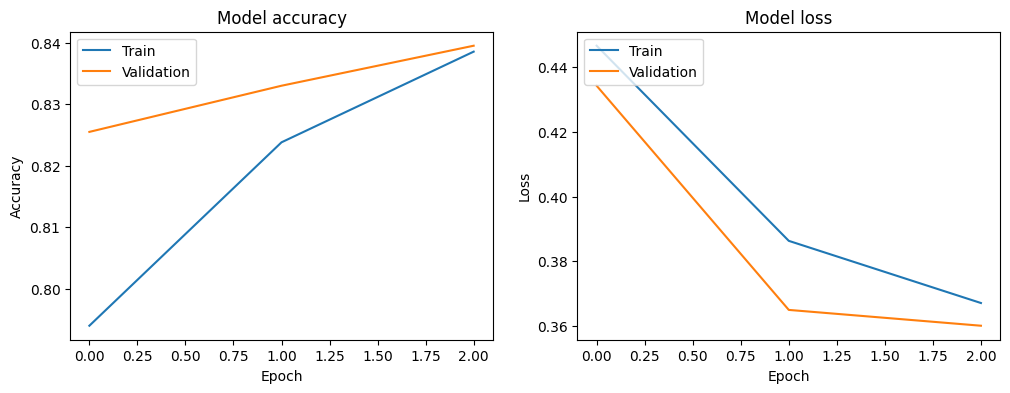

In [15]:
# Step 8: Visualize Training History
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

### Accuracy of model using CNN is 83%

### USING ANN

In [17]:
model = models.Sequential([
    Input(shape=(28, 28, 3)),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [21]:
History = model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [22]:
model.fit(
    
    train_generator,
    epochs=3,
    validation_data=valid_generator
    
)

Epoch 1/3
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 99s 41ms/step - accuracy: 0.6924 - loss: 0.6220 - val_accuracy: 0.7185 - val_loss: 0.5004
Epoch 2/3
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 109s 46ms/step - accuracy: 0.7759 - loss: 0.4638 - val_accuracy: 0.7405 - val_loss: 0.4810
Epoch 3/3
2376/2376 ━━━━━━━━━━━━━━━━━━━━ 123s 52ms/step - accuracy: 0.7785 - loss: 0.4578 - val_accuracy: 0.7515 - val_loss: 0.4631


In [23]:
test_loss, test_acc = model.evaluate(valid_generator)
print(f'Test accuracy: {test_acc}')

400/400 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.7441 - loss: 0.4738
Test accuracy: 0.7515000104904175


### USing ANN Accuracy is Almost 75%